<a href="https://colab.research.google.com/github/chinmayee95/cnn-on-image-data/blob/master/cyclegan_niftii_slice60_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# /content/drive/My\ Drive/DR/MRI_data/

['T2.tar', 'T1.tar', 'trainA', 'testA', 'trainB', 'testB', 'images', 'saved_models', 'loss_output.csv']
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [1/30], Step [1/571], D_A_loss: 0.6348, D_B_loss: 0.5772, G_A_loss: 1.0035, G_B_loss: 1.1161
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [1/30], Step [3/571], D_A_loss: 1.3776, D_B_loss: 1.7305, G_A_loss: 0.3114, G_B_loss: 0.8196
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [1/30], Step [5/571], D_A_loss: 0.2988, D_B_loss: 0.7948, G_A_loss: 1.6136, G_B_loss: 0.4890
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [1/30], Step [7/571], D_A_loss: 0.2654, D_B_loss: 0.2946, G_A_loss: 0.5477, G_B_loss: 0.5467
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [1/30], Step [9/571], D_A_loss: 0.3423, D_B_loss: 0.2872, G_A_loss: 0.4084, G_B_loss: 0.5178
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [1/30], Step [11/571], D_A_loss: 0.3041, D_B_loss: 0.2492, G_A_loss: 0.3600, G_B_loss: 0.3383
(256, 256)
(256, 256)
(256, 256)
(256

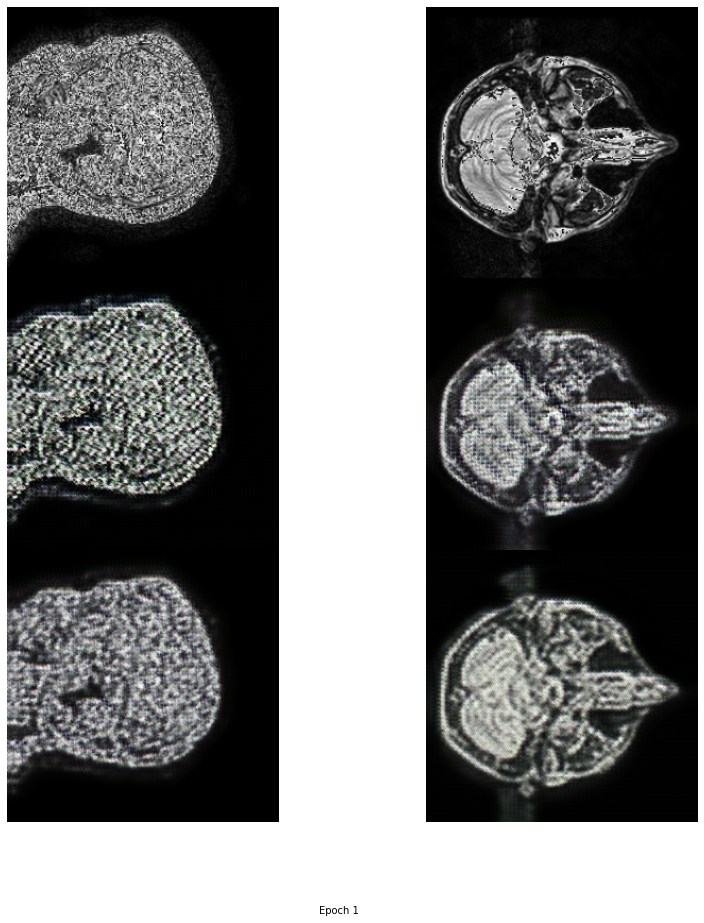

(256, 256)
(256, 256)
Epoch [2/30], Step [1/571], D_A_loss: 0.1247, D_B_loss: 0.1595, G_A_loss: 0.6436, G_B_loss: 0.4545
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [2/30], Step [3/571], D_A_loss: 0.2112, D_B_loss: 0.1120, G_A_loss: 0.3489, G_B_loss: 0.3604
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [2/30], Step [5/571], D_A_loss: 0.2251, D_B_loss: 0.1577, G_A_loss: 0.6815, G_B_loss: 0.5908
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [2/30], Step [7/571], D_A_loss: 0.4026, D_B_loss: 0.3482, G_A_loss: 0.9141, G_B_loss: 0.0351
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [2/30], Step [9/571], D_A_loss: 0.1492, D_B_loss: 0.2145, G_A_loss: 0.1732, G_B_loss: 0.7535
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [2/30], Step [11/571], D_A_loss: 0.0899, D_B_loss: 0.1422, G_A_loss: 0.7812, G_B_loss: 0.1754
(256, 256)
(256, 256)
(256, 256)
(256, 256)
Epoch [2/30], Step [13/571], D_A_loss: 0.1476, D_B_loss: 0.1524, G_A_loss: 0.3821, G_B_loss: 0.4469
(256, 256)
(256, 25

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.utils.data as data
import random
from torchvision import transforms
import nibabel as nib
from PIL import Image

import os , itertools
print(os.listdir("/content/gdrive/My Drive/DR/MRI_data/"))

import matplotlib.pyplot as plt

params = {
    'batch_size':1,
    'input_size':256,
    'resize_scale':286,
    'crop_size':256,
    'fliplr':True,
    #model params
    'num_epochs':30,
    'decay_epoch':30,
    'ngf':32,   #number of generator filters
    'ndf':64,   #number of discriminator filters
    'num_resnet':6, #number of resnet blocks
    'lrG':0.0002,    #learning rate for generator
    'lrD':0.0002,    #learning rate for discriminator
    'beta1':0.5 ,    #beta1 for Adam optimizer
    'beta2':0.999 ,  #beta2 for Adam optimizer
    'lambdaA':10 ,   #lambdaA for cycle loss
    'lambdaB':10  ,  #lambdaB for cycle loss
}

data_dir = '/content/gdrive/My Drive/DR/MRI_data/'
def to_np(x):
    return x.data.cpu().numpy()
def plot_train_result(real_image, gen_image, recon_image, epoch, save=False,  show=True, fig_size=(15, 15)):
    fig, axes = plt.subplots(3, 2, figsize=fig_size)
    imgs = [to_np(real_image[0]), to_np(real_image[1]),
            to_np(gen_image[0]), to_np(gen_image[1]), 
            to_np(recon_image[0]),to_np(recon_image[1])]
    for ax, img in zip(axes.flatten(), imgs):
        ax.axis('off')
        #ax.set_adjustable('box-forced')
        # Scale to 0-255
        img = img.squeeze()
        img = (((img - img.min()) * 255) / (img.max() - img.min())).transpose(1, 2, 0).astype(np.uint8)
        ax.imshow(img, cmap=None, aspect='equal')
    plt.subplots_adjust(wspace=0, hspace=0)

    title = 'Epoch {0}'.format(epoch + 1)
    fig.text(0.5, 0.04, title, ha='center')

    # save figure
    if save:
        save_fn = 'Result_epoch_{:d}'.format(epoch+1) + '.png'
        plt.savefig(save_fn)

    if show:
        plt.show()
    else:
        plt.close()

class ImagePool():
    def __init__(self, pool_size):
        self.pool_size = pool_size
        if self.pool_size > 0:
            self.num_imgs = 0
            self.images = []

    def query(self, images):
        if self.pool_size == 0:
            return images
        return_images = []
        for image in images.data:
            image = torch.unsqueeze(image, 0)
            if self.num_imgs < self.pool_size:
                self.num_imgs = self.num_imgs + 1
                self.images.append(image)
                return_images.append(image)
            else:
                p = random.uniform(0, 1)
                if p > 0.5:
                    random_id = random.randint(0, self.pool_size-1)
                    tmp = self.images[random_id].clone()
                    self.images[random_id] = image
                    return_images.append(tmp)
                else:
                    return_images.append(image)
        return_images = Variable(torch.cat(return_images, 0))
        return return_images
        
class DatasetFromFolder(data.Dataset):
    def __init__(self, image_dir, subfolder='train', transform=None, resize_scale=None, crop_size=None, fliplr=False):
        super(DatasetFromFolder, self).__init__()
        self.input_path = os.path.join(image_dir, subfolder)
        self.image_filenames = [x for x in sorted(os.listdir(self.input_path))]
        
        # image = nib.load(os.path.join(image_path, image_name))
        self.transform = transform
        
        self.resize_scale = resize_scale
        self.crop_size = crop_size
        self.fliplr = fliplr

    def __getitem__(self, index):
        # Load Image
        img_fn = os.path.join(self.input_path, self.image_filenames[index])
        image = nib.load(os.path.join(img_fn))
        data = image.get_fdata()
        # data = np.ones((32, 32, 15, 100), dtype=np.int16)
        # img = nib.Nifti1Image(data, np.eye(4))
        # img_n = np.uint8(data[:,:,25])
        s = data.shape
        if (s[2]==60):
          img_n = np.uint8(data[:,:,60])
        else:
          img_n = np.uint8(data[:,:,25])
        print(img_n.shape)
        img = Image.fromarray(img_n).convert('RGB')

        # preprocessing
        if self.resize_scale:
            img = img.resize((self.resize_scale, self.resize_scale), Image.BILINEAR)

        if self.crop_size:
            x = random.randint(0, self.resize_scale - self.crop_size + 1)
            y = random.randint(0, self.resize_scale - self.crop_size + 1)
            img = img.crop((x, y, x + self.crop_size, y + self.crop_size))
        if self.fliplr:
            if random.random() < 0.5:
                img = img.transpose(Image.FLIP_LEFT_RIGHT)

        if self.transform is not None:
            img = self.transform(img)

        return img

    def __len__(self):
        return len(self.image_filenames)


class ConvBlock(torch.nn.Module):
    def __init__(self,input_size,output_size,kernel_size=3,stride=2,padding=1,activation='relu',batch_norm=True):
        super(ConvBlock,self).__init__()
        self.conv = torch.nn.Conv2d(input_size,output_size,kernel_size,stride,padding)
        self.batch_norm = batch_norm
        self.bn = torch.nn.InstanceNorm2d(output_size)
        self.activation = activation
        self.relu = torch.nn.ReLU(True)
        self.lrelu = torch.nn.LeakyReLU(0.2,True)
        self.tanh = torch.nn.Tanh()
    def forward(self,x):
        if self.batch_norm:
            out = self.bn(self.conv(x))
        else:
            out = self.conv(x)
        
        if self.activation == 'relu':
            return self.relu(out)
        elif self.activation == 'lrelu':
            return self.lrelu(out)
        elif self.activation == 'tanh':
            return self.tanh(out)
        elif self.activation == 'no_act':
            return out
            
class DeconvBlock(torch.nn.Module):
    def __init__(self,input_size,output_size,kernel_size=3,stride=2,padding=1,output_padding=1,activation='relu',batch_norm=True):
        super(DeconvBlock,self).__init__()
        self.deconv = torch.nn.ConvTranspose2d(input_size,output_size,kernel_size,stride,padding,output_padding)
        self.batch_norm = batch_norm
        self.bn = torch.nn.InstanceNorm2d(output_size)
        self.activation = activation
        self.relu = torch.nn.ReLU(True)
    def forward(self,x):
        if self.batch_norm:
            out = self.bn(self.deconv(x))
        else:
            out = self.deconv(x)
        if self.activation == 'relu':
            return self.relu(out)
        elif self.activation == 'lrelu':
            return self.lrelu(out)
        elif self.activation == 'tanh':
            return self.tanh(out)
        elif self.activation == 'no_act':
            return out

class ResnetBlock(torch.nn.Module):
    def __init__(self,num_filter,kernel_size=3,stride=1,padding=0):
        super(ResnetBlock,self).__init__()
        conv1 = torch.nn.Conv2d(num_filter,num_filter,kernel_size,stride,padding)
        conv2 = torch.nn.Conv2d(num_filter,num_filter,kernel_size,stride,padding)
        bn = torch.nn.InstanceNorm2d(num_filter)
        relu = torch.nn.ReLU(True)
        pad = torch.nn.ReflectionPad2d(1)
        
        self.resnet_block = torch.nn.Sequential(
            pad,
            conv1,
            bn,
            relu,
            pad,
            conv2,
            bn
            )
    def forward(self,x):
        out = self.resnet_block(x)
        return out
        
class Generator(torch.nn.Module):
    def __init__(self,input_dim,num_filter,output_dim,num_resnet):
        super(Generator,self).__init__()
        
        #Reflection padding
        self.pad = torch.nn.ReflectionPad2d(3)
        #Encoder
        self.conv1 = ConvBlock(input_dim,num_filter,kernel_size=7,stride=1,padding=0)
        self.conv2 = ConvBlock(num_filter,num_filter*2)
        self.conv3 = ConvBlock(num_filter*2,num_filter*4)
        #Resnet blocks
        self.resnet_blocks = []
        for i in range(num_resnet):
            self.resnet_blocks.append(ResnetBlock(num_filter*4))
        self.resnet_blocks = torch.nn.Sequential(*self.resnet_blocks)
        #Decoder
        self.deconv1 = DeconvBlock(num_filter*4,num_filter*2)
        self.deconv2 = DeconvBlock(num_filter*2,num_filter)
        self.deconv3 = ConvBlock(num_filter,output_dim,kernel_size=7,stride=1,padding=0,activation='tanh',batch_norm=False)
    
    def forward(self,x):
        #Encoder
        enc1 = self.conv1(self.pad(x))
        enc2 = self.conv2(enc1)
        enc3 = self.conv3(enc2)
        #Resnet blocks
        res = self.resnet_blocks(enc3)
        #Decoder
        dec1 = self.deconv1(res)
        dec2 = self.deconv2(dec1)
        out = self.deconv3(self.pad(dec2))
        return out
    
    def normal_weight_init(self,mean=0.0,std=0.02):
        for m in self.children():
            if isinstance(m,ConvBlock):
                torch.nn.init.normal_(m.conv.weight,mean,std)
            if isinstance(m,DeconvBlock):
                torch.nn.init.normal_(m.deconv.weight,mean,std)
            if isinstance(m,ResnetBlock):
                torch.nn.init.normal_(m.conv.weight,mean,std)
                torch.nn.init.constant_(m.conv.bias,0)

class Discriminator(torch.nn.Module):
    def __init__(self,input_dim,num_filter,output_dim):
        super(Discriminator,self).__init__()
        conv1 = ConvBlock(input_dim,num_filter,kernel_size=4,stride=2,padding=1,activation='lrelu',batch_norm=False)
        conv2 = ConvBlock(num_filter,num_filter*2,kernel_size=4,stride=2,padding=1,activation='lrelu')
        conv3 = ConvBlock(num_filter*2,num_filter*4,kernel_size=4,stride=2,padding=1,activation='lrelu')
        conv4 = ConvBlock(num_filter*4,num_filter*8,kernel_size=4,stride=1,padding=1,activation='lrelu')
        conv5 = ConvBlock(num_filter*8,output_dim,kernel_size=4,stride=1,padding=1,activation='no_act',batch_norm=False)
        self.conv_blocks = torch.nn.Sequential(
            conv1,
            conv2,
            conv3,
            conv4,
            conv5
            )
    def forward(self,x):
        out = self.conv_blocks(x)
        return out
        
    def normal_weight_init(self,mean=0.0,std=0.02):
        for m in self.children():
            if isinstance(m,ConvBlock):
                torch.nn.init.normal_(m.conv.weight.data,mean,std)

transform = transforms.Compose([
    transforms.Resize(size=params['input_size']),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
train_data_A = DatasetFromFolder(data_dir, subfolder='trainA', transform=transform,
                                resize_scale=params['resize_scale'], crop_size=params['crop_size'], fliplr=params['fliplr'])
train_data_loader_A = torch.utils.data.DataLoader(dataset=train_data_A, batch_size=params['batch_size'], shuffle=True)
train_data_B = DatasetFromFolder(data_dir, subfolder='trainB', transform=transform,
                                resize_scale=params['resize_scale'], crop_size=params['crop_size'], fliplr=params['fliplr'])
train_data_loader_B = torch.utils.data.DataLoader(dataset=train_data_B, batch_size=params['batch_size'], shuffle=True)
#Load test data
test_data_A = DatasetFromFolder(data_dir, subfolder='testA', transform=transform)
test_data_loader_A = torch.utils.data.DataLoader(dataset=test_data_A, batch_size=params['batch_size'], shuffle=False)
test_data_B = DatasetFromFolder(data_dir, subfolder='testB', transform=transform)
test_data_loader_B = torch.utils.data.DataLoader(dataset=test_data_B, batch_size=params['batch_size'], shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Get specific test images
test_real_A_data = train_data_A.__getitem__(11).unsqueeze(0) # Convert to 4d tensor (BxNxHxW)
test_real_B_data = train_data_B.__getitem__(19).unsqueeze(0)
#print(test_real_A_data)
#Build Model 

if torch.cuda.is_available():
    G_A = Generator(3, params['ngf'], 3, params['num_resnet']).cuda() # input_dim, num_filter, output_dim, num_resnet
    G_B = Generator(3, params['ngf'], 3, params['num_resnet']).cuda()

    D_A = Discriminator(3, params['ndf'], 1).cuda() # input_dim, num_filter, output_dim
    D_B = Discriminator(3, params['ndf'], 1).cuda()
else:
    G_A = Generator(3, params['ngf'], 3, params['num_resnet']) # input_dim, num_filter, output_dim, num_resnet
    G_B = Generator(3, params['ngf'], 3, params['num_resnet'])

    D_A = Discriminator(3, params['ndf'], 1) # input_dim, num_filter, output_dim
    D_B = Discriminator(3, params['ndf'], 1)
G_A.normal_weight_init(mean=0.0, std=0.02)
G_B.normal_weight_init(mean=0.0, std=0.02)
D_A.normal_weight_init(mean=0.0, std=0.02)
D_B.normal_weight_init(mean=0.0, std=0.02)


G_optimizer = torch.optim.Adam(itertools.chain(G_A.parameters(), G_B.parameters()), lr=params['lrG'], betas=(params['beta1'], params['beta2']))
D_A_optimizer = torch.optim.Adam(D_A.parameters(), lr=params['lrD'], betas=(params['beta1'], params['beta2']))
D_B_optimizer = torch.optim.Adam(D_B.parameters(), lr=params['lrD'], betas=(params['beta1'], params['beta2']))

MSE_Loss = torch.nn.MSELoss()
L1_Loss = torch.nn.L1Loss()

# # Training GAN
D_A_avg_losses = []
D_B_avg_losses = []
G_A_avg_losses = []
G_B_avg_losses = []
cycle_A_avg_losses = []
cycle_B_avg_losses = []

# Generated image pool
num_pool = 10
fake_A_pool = ImagePool(num_pool)
fake_B_pool = ImagePool(num_pool)

step = 0
for epoch in range(params['num_epochs']):
    D_A_losses = []
    D_B_losses = []
    G_A_losses = []
    G_B_losses = []
    cycle_A_losses = []
    cycle_B_losses = []
    
    # Learing rate decay 
    if(epoch + 1) > params['decay_epoch']:
        D_A_optimizer.param_groups[0]['lr'] -= params['lrD'] / (params['num_epochs'] - params['decay_epoch'])
        D_B_optimizer.param_groups[0]['lr'] -= params['lrD'] / (params['num_epochs'] - params['decay_epoch'])
        G_optimizer.param_groups[0]['lr'] -= params['lrG'] / (params['num_epochs'] - params['decay_epoch'])
        
    
    # training 
    for i, (real_A, real_B) in enumerate(zip(train_data_loader_A, train_data_loader_B)):
        
        # input image data
        real_A = real_A.to(device)
        real_B = real_B.to(device)
        
        # -------------------------- train generator G --------------------------
        # A --> B
        fake_B = G_A(real_A)
        D_B_fake_decision = D_B(fake_B)
        G_A_loss = MSE_Loss(D_B_fake_decision, Variable(torch.ones(D_B_fake_decision.shape)).cuda())
        
        # forward cycle loss
        recon_A = G_B(fake_B)
        cycle_A_loss = L1_Loss(recon_A, real_A) * params['lambdaA']
        
        # B --> A
        fake_A = G_B(real_B)
        D_A_fake_decision = D_A(fake_A)
        G_B_loss = MSE_Loss(D_A_fake_decision, Variable(torch.ones(D_A_fake_decision.shape)).cuda())
        
        # backward cycle loss
        recon_B = G_A(fake_A)
        cycle_B_loss = L1_Loss(recon_B, real_B) * params['lambdaB']
        
        # Back propagation
        G_loss = G_A_loss + G_B_loss + cycle_A_loss + cycle_B_loss
        G_optimizer.zero_grad()
        G_loss.backward()
        G_optimizer.step()
        
        
        # -------------------------- train discriminator D_A --------------------------
        D_A_real_decision = D_A(real_A)
        D_A_real_loss = MSE_Loss(D_A_real_decision, Variable(torch.ones(D_A_real_decision.size())).cuda())
        
        fake_A = fake_A_pool.query(fake_A)
        
        D_A_fake_decision = D_A(fake_A)
        D_A_fake_loss = MSE_Loss(D_A_fake_decision, Variable(torch.zeros(D_A_fake_decision.size())).cuda())
        
        # Back propagation
        D_A_loss = (D_A_real_loss + D_A_fake_loss) * 0.5
        D_A_optimizer.zero_grad()
        D_A_loss.backward()
        D_A_optimizer.step()
        
        # -------------------------- train discriminator D_B --------------------------
        D_B_real_decision = D_B(real_B)
        D_B_real_loss = MSE_Loss(D_B_real_decision, Variable(torch.ones(D_B_fake_decision.size())).cuda())
        
        fake_B = fake_B_pool.query(fake_B)
        
        D_B_fake_decision = D_B(fake_B)
        D_B_fake_loss = MSE_Loss(D_B_fake_decision, Variable(torch.zeros(D_B_fake_decision.size())).cuda())
        
        # Back propagation
        D_B_loss = (D_B_real_loss + D_B_fake_loss) * 0.5
        D_B_optimizer.zero_grad()
        D_B_loss.backward()
        D_B_optimizer.step()
        
        # ------------------------ Print -----------------------------
        # loss values
        D_A_losses.append(D_A_loss.item())
        D_B_losses.append(D_B_loss.item())
        G_A_losses.append(G_A_loss.item())
        G_B_losses.append(G_B_loss.item())
        cycle_A_losses.append(cycle_A_loss.item())
        cycle_B_losses.append(cycle_B_loss.item())

        if i%2 == 0:
            print('Epoch [%d/%d], Step [%d/%d], D_A_loss: %.4f, D_B_loss: %.4f, G_A_loss: %.4f, G_B_loss: %.4f'
                  % (epoch+1, params['num_epochs'], i+1, len(train_data_loader_A), D_A_loss.item(), D_B_loss.item(), G_A_loss.item(), G_B_loss.item()))
            
        step += 1
        
    D_A_avg_loss = torch.mean(torch.FloatTensor(D_A_losses))
    D_B_avg_loss = torch.mean(torch.FloatTensor(D_B_losses))
    G_A_avg_loss = torch.mean(torch.FloatTensor(G_A_losses))
    G_B_avg_loss = torch.mean(torch.FloatTensor(G_B_losses))
    cycle_A_avg_loss = torch.mean(torch.FloatTensor(cycle_A_losses))
    cycle_B_avg_loss = torch.mean(torch.FloatTensor(cycle_B_losses))

    # avg loss values for plot
    D_A_avg_losses.append(D_A_avg_loss.item())
    D_B_avg_losses.append(D_B_avg_loss.item())
    G_A_avg_losses.append(G_A_avg_loss.item())
    G_B_avg_losses.append(G_B_avg_loss.item())
    cycle_A_avg_losses.append(cycle_A_avg_loss.item())
    cycle_B_avg_losses.append(cycle_B_avg_loss.item())
    
    # Show result for test image
    test_real_A = test_real_A_data
    test_fake_B = G_A(test_real_A.cuda())
    test_recon_A = G_B(test_fake_B.cuda())

    test_real_B = test_real_B_data
    test_fake_A = G_B(test_real_B.cuda())
    test_recon_B = G_A(test_fake_A.cuda())

    plot_train_result([test_real_A, test_real_B], [test_fake_B, test_fake_A], [test_recon_A, test_recon_B],
                            epoch, save=True)

all_losses = pd.DataFrame()
all_losses['D_A_avg_losses'] = D_A_avg_losses
all_losses['D_B_avg_losses'] = D_B_avg_losses
all_losses['G_A_avg_losses'] = G_A_avg_losses
all_losses['G_B_avg_losses'] = G_B_avg_losses
all_losses['cycle_A_avg_losses'] = cycle_A_avg_losses
all_losses['cycle_B_avg_losses'] = cycle_B_avg_losses
all_losses.to_csv('avg_losses',index=False)

In [0]:
a = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
print((a.shape))
if a.shape[1]==2:
  print(1)
else:
  print(0)

In [0]:
type(G_A(test_real_A.cuda()))

In [0]:
type(fake_A)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
device

In [0]:
torch.from_numpy(array).

In [0]:
D_B_fake_decision.size(), Variable(torch.ones(D_B_fake_decision.size())).size()

In [0]:
type(D_B_fake_decision)

In [0]:
D_B_fake_decision

In [0]:
import torch.nn.functional as F

F.mse_loss(D_B_fake_decision, Variable(torch.ones(D_B_fake_decision.size())).to(device))

In [0]:
Variable(torch.ones(D_B_fake_decision.shape)).cuda().size()